In [22]:
from keras.models import load_model
import cv2
import numpy as np
import tkinter
from tkinter import messagebox
import smtplib
from datetime import datetime
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import cv2

model = load_model('model-017.model')

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}
m_count=0
nm_count=0
m_list=[]
nm_list=[]
time_list=[]
counter=0

StartdateTimeObj = datetime.now()
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

videocapture = cv2.VideoCapture(0)
scale_factor = 1.3

while 1: 
    face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    source=cv2.VideoCapture(0)
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)

    for (x, y,w, h) in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        #print ("Number of faces detected: " + str(faces.shape[0]))
    #if(faces.shape[0]!=0):
        if(label==0):
            m_count = m_count+1
            counter=counter + 1
        if(label==1):
            nm_count = nm_count + 1
            counter=counter + 1
        if counter==2:
            pltEndTime=datetime.now()
            m_list.append(m_count)
            nm_list.append(nm_count)
            time_list.append(((StartdateTimeObj-pltEndTime).seconds))
            counter = 0
    #if (len(faces) == 1):
    #    print("1 face found")
    #else:
    #    print(format(len(faces)), " faces found")

    cv2.imshow('face', img)
    k = cv2.waitKey(30) & 0xff
    if(k == 27):
        break

cv2.destroyAllWindows()
source.release()
EnddateTimeObj = datetime.now()


In [24]:
print("People with mask",m_count)
print("People without mask",nm_count)


People with mask 23
People without mask 20


Text(66.25, 0.5, 'people detected with mask')

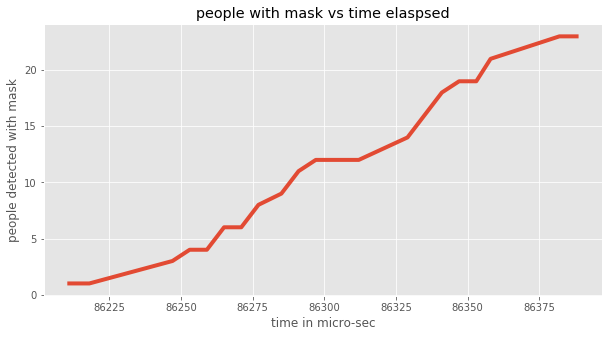

In [28]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(time_list,m_list[::-1],linewidth=4)
plt.savefig('mask vs time.png')
plt.title("people with mask vs time elaspsed")
plt.xlabel("time in micro-sec")
plt.ylabel("people detected with mask")

Text(56.625, 0.5, 'people detected without mask')

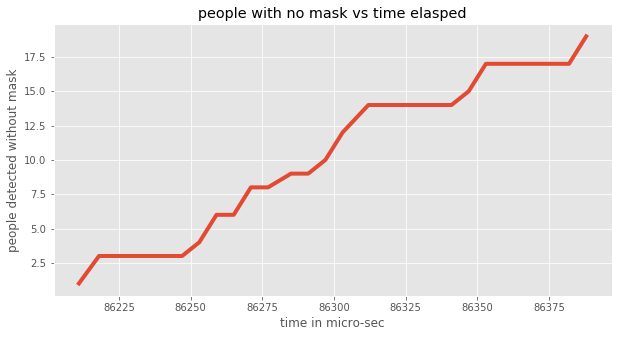

In [51]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(time_list,nm_list[::-1],linewidth=4)
plt.savefig('No_mask vs time.png')
plt.title("people with no mask vs time elasped")
plt.xlabel("time in micro-sec")
plt.ylabel("people detected without mask")

Text(56.625, 0.5, 'people without mask')

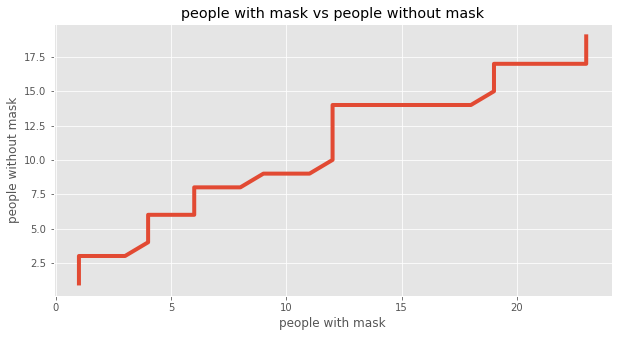

In [30]:
plt.plot(m_list,nm_list,linewidth=4)
plt.savefig('mask vs No_mask.png')
plt.title("people with mask vs people without mask")
plt.xlabel("people with mask")
plt.ylabel("people without mask")

In [43]:
#messagebox.showwarning("MONITORING PROCESS HAD ENDED","REPORT HAS BEEN GENERATED")
mail = smtplib.SMTP('smtp.gmail.com',587)
mail.ehlo()
mail.starttls
mail.ehlo()
mail.login('boytommy256@gmail.com','mirzapur')

message = f"""\
Subject: MASK ANALYSIS REPORT ' {StartdateTimeObj} '-- ' {EnddateTimeObj} '
To: boytommy256@gmail.com
From: boytommy256@gmail.com

report:
People with mask :{m_count}
People without mask :{nm_count}
"""

mail.sendmail('boytommy256@gmail.com','boytommy256@gmail.com',message)
mail.close()

SMTPNotSupportedError: SMTP AUTH extension not supported by server.

In [50]:
email = 'boytommy256@gmail.com' # Your email
password = 'mirzapur' # Your email account password
send_to_email = 'boytommy256@gmail.com' # Who you are sending the message to
message = f"""\
Subject: MASK ANALYSIS REPORT ' {StartdateTimeObj} '-- ' {EnddateTimeObj} '
To: boytommy256@gmail.com
From: boytommy256@gmail.com

report:
People with mask :{m_count}
People without mask :{nm_count}
""" # The message in the email

server = smtplib.SMTP('smtp.gmail.com', 587) # Connect to the server
server.starttls() # Use TLS
server.login(email, password) # Login to the email server
server.sendmail(email, send_to_email , message) # Send the email
server.quit() # Logout of the email server

(221, b'2.0.0 closing connection z125sm23312580pfz.121 - gsmtp')